<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_NLP_Starbucks_CustomerReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.corpus import stopwords

# Loading the Dataset

In [2]:
!kaggle datasets download -d harshalhonde/starbucks-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
starbucks-reviews-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zipfile_path = '/content/starbucks-reviews-dataset.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [4]:
data=pd.read_csv("/content/reviews_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


# Data Preprocessing

<Axes: xlabel='Rating', ylabel='Count'>

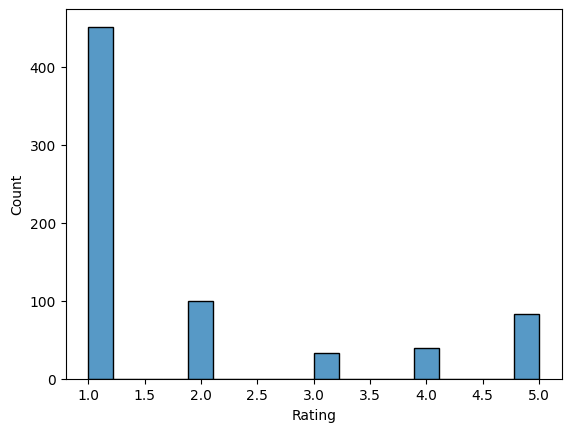

In [6]:
# histogram distribution of Rating column
sns.histplot(data['Rating'])

In [5]:
# Filling missing values on Rating column with median
data['Rating'].fillna(data['Rating'].median(), inplace=True)

<ipython-input-5-1f77f518dbeb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].median(), inplace=True)


In [8]:
data.isnull().sum()

,0
name,0
location,0
Date,0
Rating,0
Review,0
Image_Links,0


In [10]:
data['Review'].head(10)

,Review
0,Amber and LaDonna at the Starbucks on Southwes...
1,** at the Starbucks by the fire station on 436...
2,I just wanted to go out of my way to recognize...
3,Me and my friend were at Starbucks and my card...
4,I’m on this kick of drinking 5 cups of warm wa...
5,We had to correct them on our order 3 times. T...
6,I have tried Starbucks several different times...
7,Starbucks near me just launched new fall foods...
8,"I ordered online for the Reisterstown Rd, St T..."
9,Staff at the Smythe St. Superstore location in...


## Lowercasing Review column

In [6]:
data['Review'] = data['Review'].str.lower()
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber and ladonna at the starbucks on southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,i just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,me and my friend were at starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,i’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


Removing any punctuation in Review column

In [11]:
data['Review'] = data['Review'].str.replace(r'[^\w\s]', '', regex=True)
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber and ladonna at the starbucks on southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,at the starbucks by the fire station on 436 i...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,i just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,me and my friend were at starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,im on this kick of drinking 5 cups of warm wat...,['https://media.consumeraffairs.com/files/cach...


## Applying Tokenization

In [12]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
from nltk.tokenize import wordpunct_tokenize, word_tokenize

data['Review'] = data['Review'].astype(str)
data['Review'] = data['Review'].apply(lambda x: word_tokenize(x))
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,"[amber, and, ladonna, at, the, starbucks, on, ...",['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,"[at, the, starbucks, by, the, fire, station, o...",['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,"[i, just, wanted, to, go, out, of, my, way, to...",['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,"[me, and, my, friend, were, at, starbucks, and...",['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,"[im, on, this, kick, of, drinking, 5, cups, of...",['https://media.consumeraffairs.com/files/cach...


## Getting Rid of Stopwords

In [14]:
#Removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x if x not in stop))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber ladonna starbucks southwest parkway alwa...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,starbucks fire station 436 altamonte springs f...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,wanted go way recognize starbucks employee bil...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,friend starbucks card didnt work thankful work...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,im kick drinking 5 cups warm water work instac...,['https://media.consumeraffairs.com/files/cach...


## Applying Lemmatization

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
#Applying lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
data['Review'] = data['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber ladonna starbucks southwest parkway alwa...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,starbucks fire station 436 altamonte spring fl...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,wanted go way recognize starbucks employee bil...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,friend starbucks card didnt work thankful work...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,im kick drinking 5 cup warm water work instaca...,['https://media.consumeraffairs.com/files/cach...


## Using VADER

A lexicon for sentiment analysis (used in sentiment analysis tasks).

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [18]:
# Applying Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data['scores'] = data['Review'].apply(lambda review: sid.polarity_scores(review))
data.head()

,name,location,Date,Rating,Review,Image_Links,scores
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber ladonna starbucks southwest parkway alwa...,['No Images'],"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,starbucks fire station 436 altamonte spring fl...,['No Images'],"{'neg': 0.077, 'neu': 0.588, 'pos': 0.335, 'co..."
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,wanted go way recognize starbucks employee bil...,['https://media.consumeraffairs.com/files/cach...,"{'neg': 0.143, 'neu': 0.63, 'pos': 0.226, 'com..."
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,friend starbucks card didnt work thankful work...,['No Images'],"{'neg': 0.144, 'neu': 0.485, 'pos': 0.371, 'co..."
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,im kick drinking 5 cup warm water work instaca...,['https://media.consumeraffairs.com/files/cach...,"{'neg': 0.043, 'neu': 0.502, 'pos': 0.455, 'co..."


Compounding

In [19]:
# Applying Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data['scores'] = data['Review'].apply(lambda review: sid.polarity_scores(review))
data.head()

data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head()

data['comp_score'] = data['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
data.head()

,name,location,Date,Rating,Review,Image_Links,scores,compound,comp_score
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber ladonna starbucks southwest parkway alwa...,['No Images'],"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8779,positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,starbucks fire station 436 altamonte spring fl...,['No Images'],"{'neg': 0.077, 'neu': 0.588, 'pos': 0.335, 'co...",0.9670,positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,wanted go way recognize starbucks employee bil...,['https://media.consumeraffairs.com/files/cach...,"{'neg': 0.143, 'neu': 0.63, 'pos': 0.226, 'com...",0.4215,positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,friend starbucks card didnt work thankful work...,['No Images'],"{'neg': 0.144, 'neu': 0.485, 'pos': 0.371, 'co...",0.9028,positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,im kick drinking 5 cup warm water work instaca...,['https://media.consumeraffairs.com/files/cach...,"{'neg': 0.043, 'neu': 0.502, 'pos': 0.455, 'co...",0.9714,positive


## Sentiment Analysis Visualization

<ipython-input-21-ec481ca3270d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


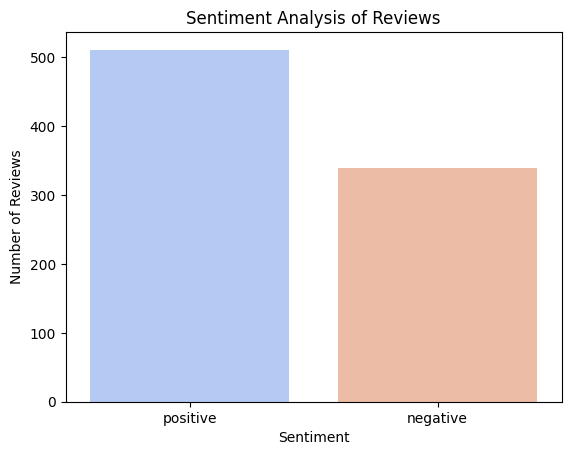

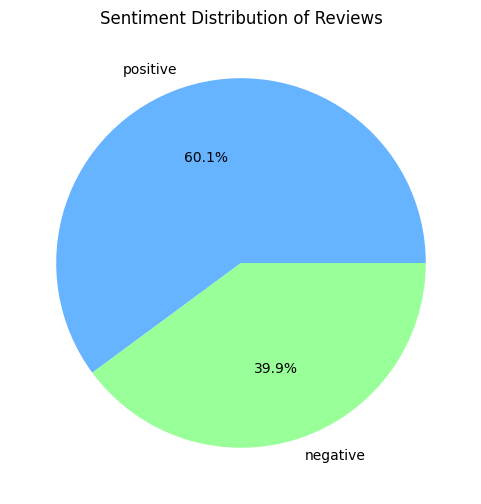

In [21]:
#Count the number of positive and negative reviews
sentiment_counts = data['comp_score'].value_counts()

#Plot a bar graph
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(6, 6))
data['comp_score'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')
plt.show()

Insight: There are more positive than negative sentiment. However the number of negative sentiments is quite alarming signaling the need to pay attention to the particular sentiments and address them.

Sentiment Score Distribution

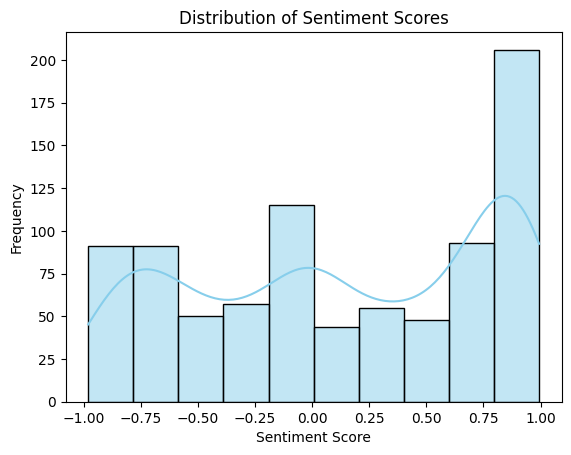

In [22]:
sns.histplot(data['compound'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The Sentiment score is generally positive signaling that starbucks has general positive customer satisfaction

## Word Cloud Visualization

(-0.5, 799.5, 399.5, -0.5)

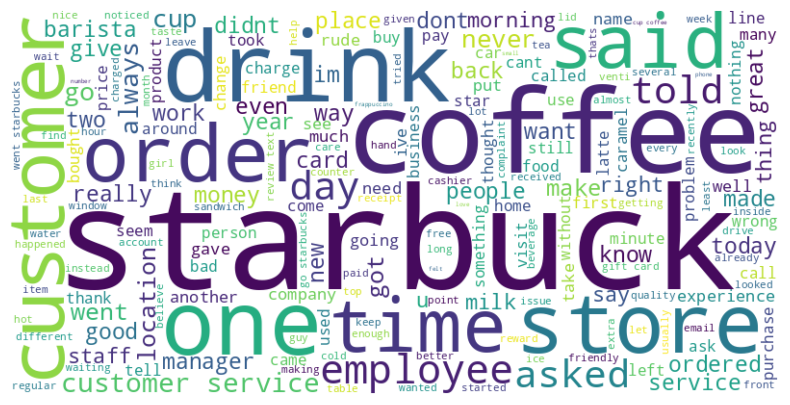

In [23]:
from wordcloud import WordCloud

text = " ".join(review for review in data.Review)
#Applying word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Extracting Features

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Using TFIDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])

In [27]:
data.tail()

,name,location,Date,Rating,Review,Image_Links,scores,compound,comp_score
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",1.0,ordered two venti frappacinos without whipped ...,['No Images'],"{'neg': 0.154, 'neu': 0.769, 'pos': 0.077, 'co...",-0.3182,negative
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",1.0,review text,['No Images'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",1.0,demanded tip made wait coffee cold melted 20 y...,['No Images'],"{'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'comp...",-0.6249,negative
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",1.0,review text,['No Images'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
849,Christian,"Ramsey, NJ","Reviewed July 19, 2000",1.0,review text,['No Images'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive


In [35]:
data.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links', 'scores',
       'compound', 'comp_score'],
      dtype='object')

Sentiment Distribution visualization

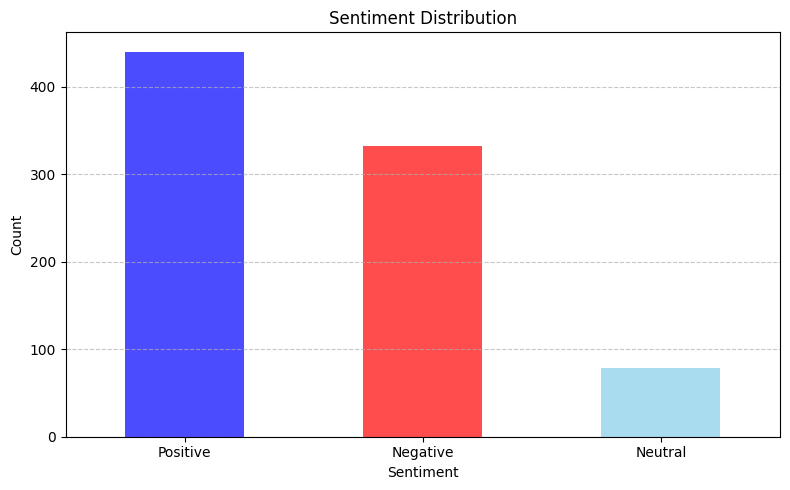

In [37]:
# Bar grpah to show the count of differnt values in the sentiment column'
# Define thresholds for sentiment categories
def categorize_sentiment(compound):
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    elif -0.05 <= compound <= 0.05:
        return 'Neutral'
    else:
        return 'Irrelevant'  # Adjust criteria as needed

# Apply categorization
data['Sentiment'] = data['compound'].apply(categorize_sentiment)

# Count occurrences of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['blue', 'red', 'skyblue', 'gray'], alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Insight: More positive sentiments signal above average customer satisfaction and feedback.

## Handling Class Imbalance

In [38]:
#Using smote to deal with imbalanced data
from imblearn.over_sampling import SMOTE

#Applying smote to the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, data['Sentiment'])

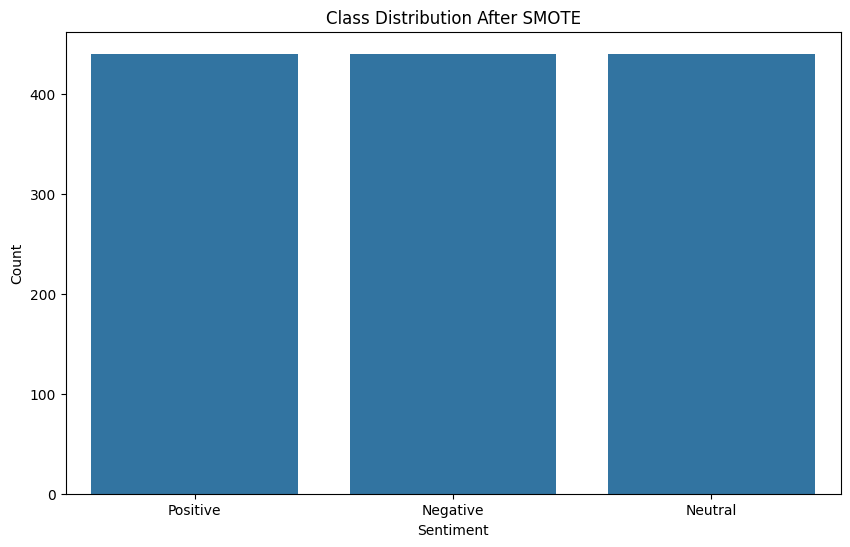

In [39]:
resampled_df = pd.DataFrame(y_resampled, columns=['Sentiment'])
plt.figure(figsize=(10, 6))
sns.countplot(x=resampled_df['Sentiment'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Insight: Sentiments are now equally distributed (balanced) in readiness for modeling

In [40]:
X_resampled

<1320x5601 sparse matrix of type '<class 'numpy.float64'>'
	with 50403 stored elements in Compressed Sparse Row format>

In [41]:
y_resampled

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
1315,Neutral
1316,Neutral
1317,Neutral
1318,Neutral


## Splitting the Dataset

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Modeling

## Logistic Regression

In [46]:
# Create and train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [47]:
# Predictions on test data
y_pred = model.predict(X_test)

LOGISTICE REGRESSION EVALUATION METRICS

In [50]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8220
Precision: 0.8330
Recall: 0.8220
F1-Score: 0.8233
Confusion Matrix:
[[70  0 14]
 [ 3 85  1]
 [29  0 62]]


  CONFUSSION MATRIX

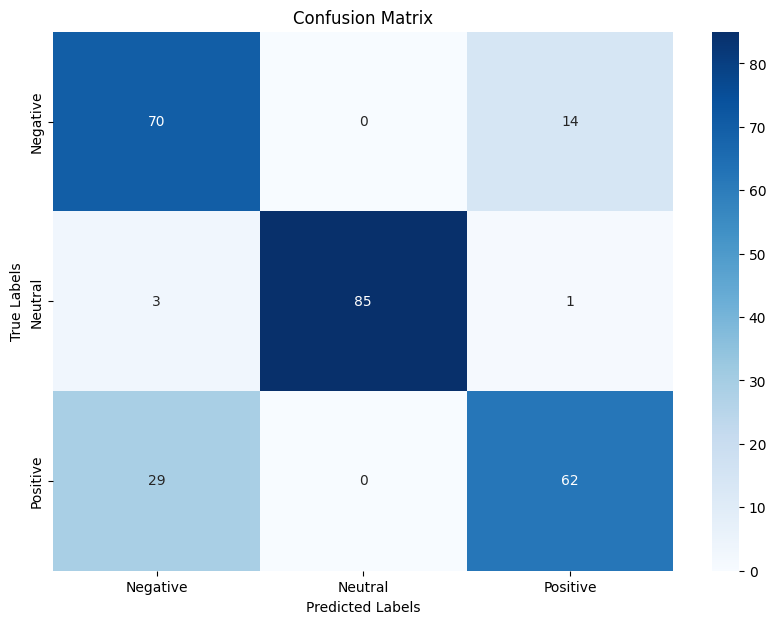

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

PLOTTING MISSCLASSIFIED VALUES

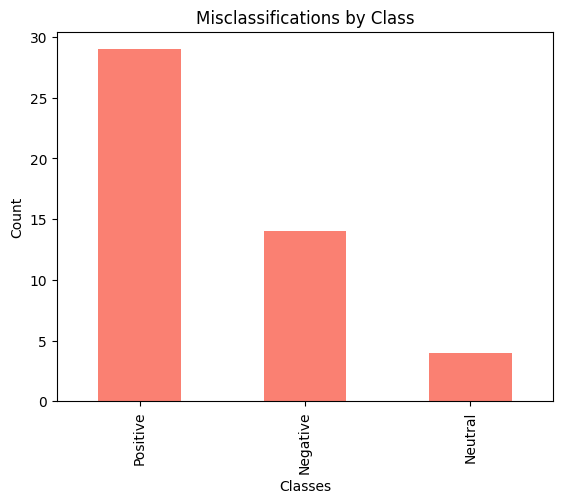

In [52]:
# Create a DataFrame for actual vs predicted labels
df_errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Filter the rows where prediction is incorrect
misclassified = df_errors[df_errors['Actual'] != df_errors['Predicted']]

# Plot the count of misclassifications by class
misclassified_counts = misclassified['Actual'].value_counts()
misclassified_counts.plot(kind='bar', color='salmon')
plt.title('Misclassifications by Class')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

COMPARING ACTUAL VS PREDICTED VALUES

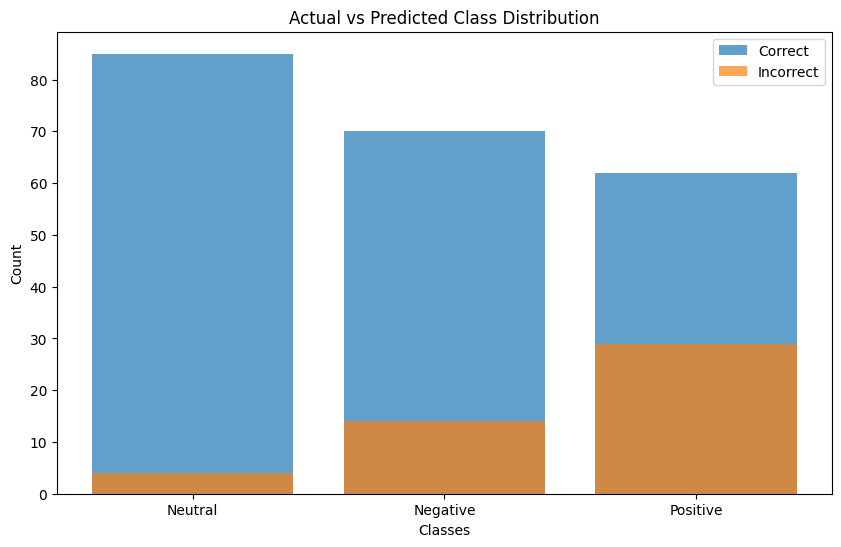

In [53]:
correct = df_errors[df_errors['Actual'] == df_errors['Predicted']]
correct_counts = correct['Actual'].value_counts()

# Plot for correct and incorrect classifications
plt.figure(figsize=(10, 6))
plt.bar(correct_counts.index, correct_counts.values, label="Correct", alpha=0.7)
plt.bar(misclassified_counts.index, misclassified_counts.values, label="Incorrect", alpha=0.7)
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()

EXTRACTING MISSCLASSIFIED ROWS

In [54]:
# Extract the rows where predictions were incorrect
misclassified_instances = df_errors[df_errors['Actual'] != df_errors['Predicted']]

# Display the actual and predicted values for a few errors
print(misclassified_instances.head())

       Actual Predicted
678  Negative  Positive
730  Positive  Negative
705  Positive  Negative
76   Positive  Negative
493  Negative  Positive


CLASSIFICATION REPORT

              precision    recall  f1-score   support

    Positive       0.69      0.83      0.75        84
    Negative       1.00      0.96      0.98        89
     Neutral       0.81      0.68      0.74        91

    accuracy                           0.82       264
   macro avg       0.83      0.82      0.82       264
weighted avg       0.83      0.82      0.82       264



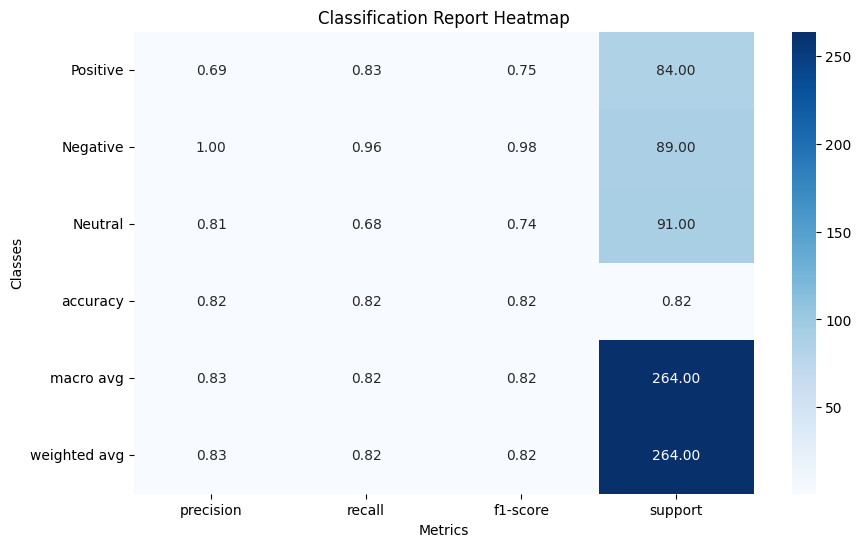

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=data.Sentiment.unique()))
# Generate classification report
report = classification_report(y_test, y_pred, target_names=data.Sentiment.unique(), output_dict=True)
# Convert report to DataFrame
report_df = pd.DataFrame(report).transpose()
# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## SAMPLE PREDICTIONS TO NEW DATA

In [59]:
# Example prediction on new customer review
# Assuming you have a clean_text function for preprocessing
def clean_text(text):
    # Implement any text cleaning process here, e.g., removing punctuation, converting to lowercase
    text = text.lower()  # Example step: convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

new_review = ["this service was decent. the coffee was good"] # Example new review to predict
new_review_cleaned = [clean_text(review) for review in new_review] # Clean the review text
new_review_vectorized = vectorizer.transform(new_review_cleaned) # Vectorize the cleaned review using the same vectorizer as before
prediction = model.predict(new_review_vectorized) # Make the prediction using the trained model
print("Prediction:", prediction) # Output the prediction

Prediction: ['Positive']


In [61]:
# Example prediction on new customer review
# Assuming you have a clean_text function for preprocessing
def clean_text(text):
    # Implement any text cleaning process here, e.g., removing punctuation, converting to lowercase
    text = text.lower()  # Example step: convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

new_review = ["this service was horrible. the coffee was very bad"] # Example new review to predict
new_review_cleaned = [clean_text(review) for review in new_review] # Clean the review text
new_review_vectorized = vectorizer.transform(new_review_cleaned) # Vectorize the cleaned review using the same vectorizer as before
prediction = model.predict(new_review_vectorized) # Make the prediction using the trained model
print("Prediction:", prediction) # Output the prediction

Prediction: ['Negative']


In [65]:
# Example prediction on new customer review
# Assuming you have a clean_text function for preprocessing
def clean_text(text):
    # Implement any text cleaning process here, e.g., removing punctuation, converting to lowercase
    text = text.lower()  # Example step: convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

new_review = ["the coffee at starbucks was average"] # Example new review to predict
new_review_cleaned = [clean_text(review) for review in new_review] # Clean the review text
new_review_vectorized = vectorizer.transform(new_review_cleaned) # Vectorize the cleaned review using the same vectorizer as before
prediction = model.predict(new_review_vectorized) # Make the prediction using the trained model
print("Prediction:", prediction) # Output the prediction

Prediction: ['Positive']


## Random Forest Classifier

In [66]:
#Trying random forest
from sklearn.ensemble import RandomForestClassifier

# Create and train the Logistic Regression model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=data.Sentiment.unique()))


Accuracy: 80.30%
              precision    recall  f1-score   support

    Positive       0.70      0.71      0.71        84
    Negative       1.00      0.94      0.97        89
     Neutral       0.72      0.75      0.74        91

    accuracy                           0.80       264
   macro avg       0.81      0.80      0.80       264
weighted avg       0.81      0.80      0.81       264



EXAMPLE RANDOM FOREST MODEL PREDICITON

In [69]:
# Example prediction on new customer review
# Assuming you have a clean_text function for preprocessing
def clean_text(text):
    # Implement any text cleaning process here, e.g., removing punctuation, converting to lowercase
    text = text.lower()  # Example step: convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text


new_review = ["very bad coffee"] # Example new review to predict
new_review_cleaned = [clean_text(review) for review in new_review] # Clean the review text
new_review_vectorized = vectorizer.transform(new_review_cleaned) # Vectorize the cleaned review using the same vectorizer as before
prediction = model.predict(new_review_vectorized) # Make the prediction using the trained model
print("Prediction:", prediction) # Output the prediction

Prediction: ['Positive']


## Support Vector Machine Classification

In [71]:
#Trying SVC
from sklearn.svm import SVC

# Create and train the Logistic Regression model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=data.Sentiment.unique()))


Accuracy: 82.95%
              precision    recall  f1-score   support

    Positive       0.70      0.81      0.75        84
    Negative       1.00      0.97      0.98        89
     Neutral       0.80      0.71      0.76        91

    accuracy                           0.83       264
   macro avg       0.83      0.83      0.83       264
weighted avg       0.84      0.83      0.83       264



In [72]:
# Example prediction on new customer review
# Assuming you have a clean_text function for preprocessing
def clean_text(text):
    # Implement any text cleaning process here, e.g., removing punctuation, converting to lowercase
    text = text.lower()  # Example step: convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text


new_review = ["very very bad coffee"] # Example new review to predict
new_review_cleaned = [clean_text(review) for review in new_review] # Clean the review text
new_review_vectorized = vectorizer.transform(new_review_cleaned) # Vectorize the cleaned review using the same vectorizer as before
prediction = model.predict(new_review_vectorized) # Make the prediction using the trained model
print("Prediction:", prediction) # Output the prediction

Prediction: ['Negative']
